In [1]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

#%%

###################################
# Simulemos los valores propios
###################################

b  = 1
sb = 0.01
sf = 0.000158
se = 0.0045
k = 4
n = 80

x1 = np.zeros((150,1),dtype = float)
x2 = np.zeros((150,1),dtype = float)
x3 = np.zeros((150,1),dtype = float)
arreglo_5 = np.ndarray(shape=(100,5))*0 #Definimos un arreglo con ceros
prom_eig = np.ndarray(shape=(150,5))*0
indx = np.ndarray(shape=(150,1))*0
bajo = np.zeros((150,5))
alto = np.zeros((150,5))

###################################
# Generamos los valores teóricos
###################################

for p in range(50,200) :
    #print(p)
    la1 = (sf*p*(b**2*k+sb)+se)*(1+(1/n)*(se/(sf*(sb+k*b**2)) ))
    x1[p-50]= la1

    la2 = se*(1+np.sqrt(p/n))**2
    #sf*p*sb+se
    x2[p-50] = la2
    
    x3[p-50] = se
    

for i in range(50,200):
    indx[i-50] = i+1
    
  



<Figure size 640x480 with 1 Axes>

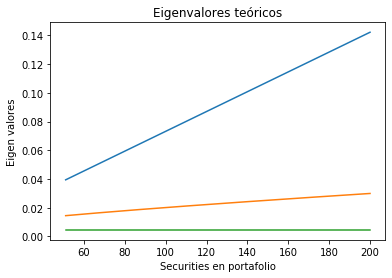

In [2]:
###############################
#Ahora vamos a graficarlos

#fig_teorico, ax = plt.subplots()    
plt.plot(indx,x1,indx,x2, indx,x3)
plt.ylabel("Eigen valores")
plt.xlabel("Securities en portafolio")
plt.title("Eigenvalores teóricos")
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.show()  

In [4]:
#fig_teorico.savefig("fig_teorico.pdf", bbox_inches='tight')  
#%%
#Ahora vamos a generar la matriz R

#p = 50 # Para ver si funciona, fijamos el p
for p in range(50,200) :

    for i in range(1,101):
       L =np.random.normal(b,np.sqrt(sb),(p,4))  #Nuestra matriz L
       f = np.random.normal(0,np.sqrt(sf),(4,n)) #Nuestra matriz f
       ep = np.random.normal(0,np.sqrt(se),(p,n)) #Nuestra matriz de valores aleatorios
       R = np.dot(L,f)+ep #Generamos la matriz R,
       #No hacemos
       S = (1/n)*np.dot(R,np.transpose(R)) #Sacamos la matriz Sigma 
       eig_val = LA.eig(S)[0] #Sacamos los eigenvalores 
       orden = np.sort(eig_val)[::-1] 
       #eig_val.sort() #Ordenamos 
       #Lo siguiente es tomar los eigenvalores más altos 
       arreglo_5[i-1] = orden[0:5]
       #arreglo_5[i-1] = eig_val[-5:]
       # print(i)

    #sacamos el promedio de las 100 veces y el intercuantil
    prom_eig[p-50] = np.mean(arreglo_5, axis = 0)
    bajo[p-50] = np.quantile(arreglo_5, 0.25, axis = 0)
    alto[p-50] = np.quantile(arreglo_5, 0.75, axis = 0)
    print(p)
    
  

50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


C:\Users\chiqu\.conda\envs\work_hard\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


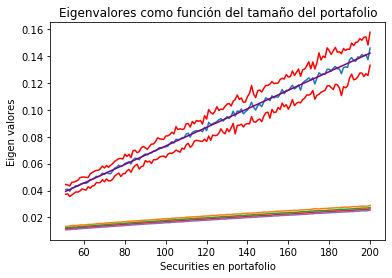

In [5]:
#Ahora vamos a graficarlos
#%%
#Ahora vamos a generar la matriz R
#fig, ax = plt.subplots()
  
plt.plot(indx,prom_eig[:,0],indx,prom_eig[:,1],indx,prom_eig[:,2],indx,prom_eig[:,3],indx,prom_eig[:,4])
plt.plot(indx,alto[:,0],c ="red")
plt.plot(indx,bajo[:,0],c ="red")
plt.plot(indx,x1,linestyle='-',c="purple")
#plt.axis('off')
plt.ylabel("Eigen valores")
plt.xlabel("Securities en portafolio")
plt.title("Eigenvalores como función del tamaño del portafolio")
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.show()    

#fig.savefig("grafico_secur.pdf", bbox_inches='tight')  